<a href="https://colab.research.google.com/github/towcorp/analise_noticias-vaderSentiment/blob/main/noticiasCripto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Sentimentos de Manchetes em Tempo Real

In [1]:
#Baxiar o pacote necessario
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 9.8 MB/s 


In [2]:
# importando as bibliotecas necessarias
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
from wordcloud import WordCloud
nltk.download('stopwords')
nltk.download('rslp')
%matplotlib inline
import nltk.corpus
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


In [3]:
# CRIANDO A FUNÇÃO DE RASPAGEM DE DADOS
def parser(website):
    r = requests.get(website)
    content = r.content
    soup = BeautifulSoup(content, "html.parser")
    headings = soup.find_all(re.compile(r"^h\d$"))
    company = []
    for h in headings:
        # avoid ads
        if len(h.text.strip().split()) > 6:
            company.append(str.strip(h.text))
    return company

In [4]:
#  ADICIONANDO PRINCIPAIS PORTAIS DE NOTICIAS 
busca_sites = ["https://bitcoinist.com/", "https://ambcrypto.com/", "https://cryptopotato.com/", "https://www.newsbtc.com/", 'https://cashessentials.org/?s=bitcoin&gclid=CjwKCAjwhaaKBhBcEiwA8acsHGAfsRLQVishTHK4Dsid7pWqUm_cLH8ZJ5DMSk0UVUsJZ4oKieSacxoCercQAvD_BwE', 'https://www.coindesk.com/', 'https://cointelegraph.com.br/tags/bitcoin', 'https://www.independent.co.uk/life-style/gadgets-and-tech/bitcoin-news-live-price-btc-crypto-b1923315.html', 'https://finance.yahoo.com/topic/crypto/', 'https://www.independent.co.uk/life-style/gadgets-and-tech/bitcoin-news-live-price-btc-crypto-b1923315.html']

print('quantiadde de sites pesquisados:' , len(busca_sites))


quantiadde de sites pesquisados: 10


In [5]:
# aplicando busca de portais na função e gerando uuma lista das principais noticias
noticias = []
for site in busca_sites:
  noticias.append(parser(site))


In [6]:
# gerando as stopWords 
lista_stop = nltk.corpus.stopwords.words()
words = []
for i in noticias:
  for p in i:
    if p not in lista_stop:
      words.append(p)

words = str(words)


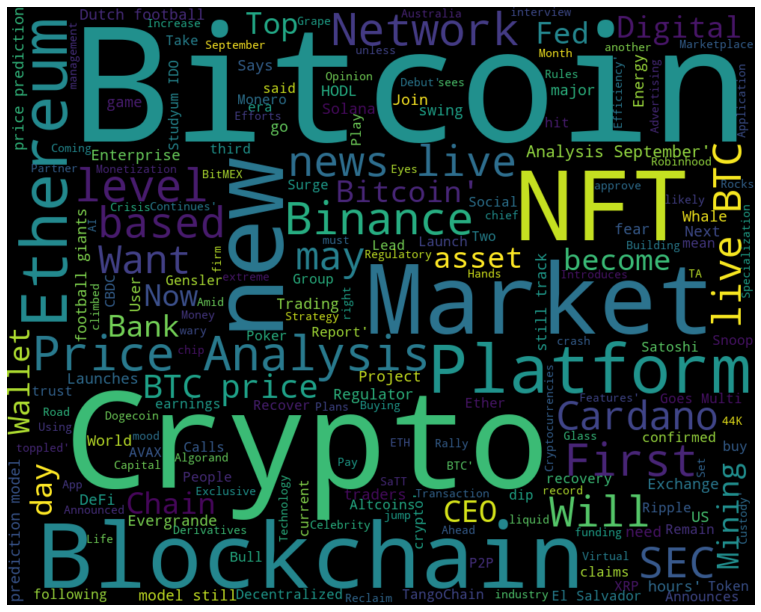

In [7]:
# criado a nuvem de palavras mais comentadas nas noticias
wordcloud = WordCloud(width=1000, height=800, margin=0).generate(words)
plt.figure(figsize=(20,11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x=0, y=0)

# Analisando as noticas

In [8]:
analiser = SentimentIntensityAnalyzer() 

analise_txt = pd.DataFrame()

In [9]:
def data_sentimento(dados_site):
  lst_dict = []
  analise_txt = pd.DataFrame()
  for site in dados_site:
    for text in site:
      sent1 = analiser.polarity_scores(text)
     
      lst_dict.append(sent1)
      sent1['text'] = text

    analise_txt = analise_txt.append(lst_dict)
  return analise_txt

sites_lidos = data_sentimento(noticias)
sites_lidos

,neg,neu,pos,compound,text
0,0.000,1.000,0.0,0.0000,Economist Calls Bitcoin “A Nobel Prize-Winning...
1,0.147,0.853,0.0,-0.2263,"Binance Teamed Up With US Law Enforcement, Too..."
2,0.000,1.000,0.0,0.0000,Is Snoop Dogg A Mysterious NFT Whale?
3,0.000,1.000,0.0,0.0000,"After A Multi-Month Period of Development, SaT..."
4,0.000,1.000,0.0,0.0000,A New Metaverse Project That Has Started to Sp...
...,...,...,...,...,...
190,0.000,1.000,0.0,0.0000,Bitcoin price crashed 90 per cent in network g...
191,0.000,1.000,0.0,0.0000,Bitcoin wallet from the Satoshi Nakamoto era s...
192,0.000,1.000,0.0,0.0000,1/1Bitcoin news live: BTC price prediction mod...
193,0.000,1.000,0.0,0.0000,Bitcoin news live: BTC price prediction model ...


In [10]:
df = pd.DataFrame(np.array(sites_lidos), columns = ['negative', 'neutro', 'positive', 'compound', 'text'])
df.head()

,negative,neutro,positive,compound,text
0,0,1,0,0,Economist Calls Bitcoin “A Nobel Prize-Winning...
1,0.147,0.853,0,-0.2263,"Binance Teamed Up With US Law Enforcement, Too..."
2,0,1,0,0,Is Snoop Dogg A Mysterious NFT Whale?
3,0,1,0,0,"After A Multi-Month Period of Development, SaT..."
4,0,1,0,0,A New Metaverse Project That Has Started to Sp...


In [11]:
df['negative'].describe()

count     1260.0
unique      36.0
top          0.0
freq       999.0
Name: negative, dtype: float64

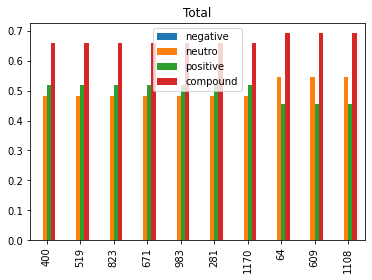

In [12]:
df.sort_values(by='positive', ascending=False).head(10).plot.bar(title="Total")

In [13]:
dfNP = df.drop(columns=('text'))
dfNP = dfNP.drop(columns=('compound'))
dfNP = dfNP.drop(columns=('neutro'))
dfNGmax = df.sort_values(by='negative', ascending=False).head(10)


([], <a list of 0 Text major ticklabel objects>)

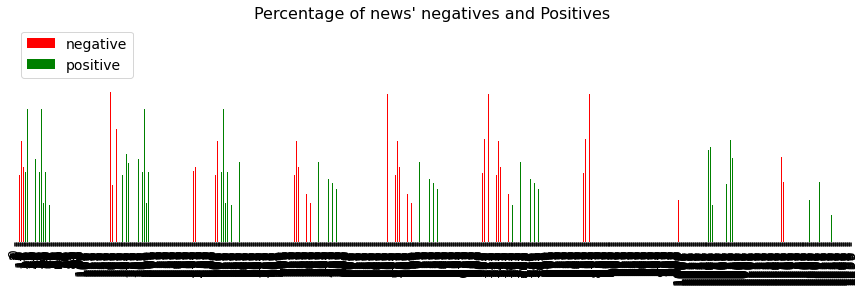

In [14]:
colors_list = ['red','green']
dfNP.plot(kind='bar',figsize=(15,4),width = 0.3,color = colors_list,edgecolor=None)
plt.legend(labels=dfNP.columns,fontsize= 14)
plt.title("Percentage of news' negatives and Positives",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.yticks([])

In [15]:
df.nunique()

negative     36
neutro       68
positive     52
compound     51
text        170
dtype: int64

In [16]:
df.max()*100

negative                                                 43.4
neutro                                                    100
positive                                                 51.9
compound                                                80.74
text        eToro Commits $1M Stake to GoodDollar Universa...
dtype: object

In [17]:
resultado = (df['negative']+df['positive']).mean()
print(round(resultado*100,2), '% favoravel')


10.85 % favoravel


4.24 % diferença COMPOSTA


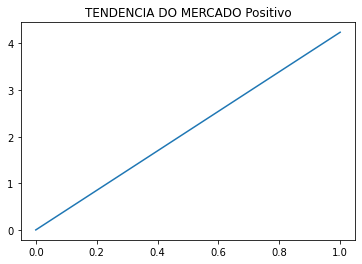

In [18]:
# TESTANDO VARIAÇÕES 

nega = df['negative'].max()-df['negative'].min()
posi = df['positive'].max()-df['positive'].min()
comp = df['compound'].max()+df['compound'].min()
favoravel = (posi+nega)
mercado = comp*100
print((round(mercado,2)), '% diferença COMPOSTA')

if mercado < 0:
  plt.plot([0, 1], [0, mercado])
  plt.title('TENDENCIA DO MERCADO Negativo')

  plt.show()
else:

  plt.plot([0, 1], [0, mercado])
  plt.title('TENDENCIA DO MERCADO Positivo')
  plt.show()

In [19]:
dominancia_mercado = df['compound'].mean()
print(round(dominancia_mercado,2), '% diferença MEDIA')

0.04 % diferença MEDIA


In [20]:
df.sort_values(by='negative', ascending=False).head(10)

,negative,neutro,positive,compound,text
1249,0.434,0.445,0.12,-0.7234,Clean water crisis: 'We don't want to play the...
1062,0.434,0.445,0.12,-0.7234,Clean water crisis: 'We don't want to play the...
149,0.398,0.435,0.168,-0.5719,BitcoinOrg Hacked: Giveaway Scam Promising Use...
785,0.398,0.435,0.168,-0.5719,BitcoinOrg Hacked: Giveaway Scam Promising Use...
1132,0.398,0.435,0.168,-0.5719,BitcoinOrg Hacked: Giveaway Scam Promising Use...
945,0.398,0.435,0.168,-0.5719,BitcoinOrg Hacked: Giveaway Scam Promising Use...
243,0.398,0.435,0.168,-0.5719,BitcoinOrg Hacked: Giveaway Scam Promising Use...
633,0.398,0.435,0.168,-0.5719,BitcoinOrg Hacked: Giveaway Scam Promising Use...
481,0.398,0.435,0.168,-0.5719,BitcoinOrg Hacked: Giveaway Scam Promising Use...
362,0.398,0.435,0.168,-0.5719,BitcoinOrg Hacked: Giveaway Scam Promising Use...


In [21]:
noticiaN = df.sort_values(by='negative', ascending=False).head(1)
noticiaN['text']

1249    Clean water crisis: 'We don't want to play the...
Name: text, dtype: object

In [22]:
df.sort_values(by='compound', ascending=False).head(-10)

,negative,neutro,positive,compound,text
691,0,0.61,0.39,0.8074,The California-based asset manager said the ne...
843,0,0.61,0.39,0.8074,The California-based asset manager said the ne...
1190,0,0.61,0.39,0.8074,The California-based asset manager said the ne...
1003,0,0.61,0.39,0.8074,The California-based asset manager said the ne...
539,0,0.61,0.39,0.8074,The California-based asset manager said the ne...
...,...,...,...,...,...
798,0.338,0.662,0,-0.6249,Ethereum Price Analysis: ETH Bulls Fight to Re...
494,0.338,0.662,0,-0.6249,Ethereum Price Analysis: ETH Bulls Fight to Re...
375,0.338,0.662,0,-0.6249,Ethereum Price Analysis: ETH Bulls Fight to Re...
256,0.338,0.662,0,-0.6249,Ethereum Price Analysis: ETH Bulls Fight to Re...
